# Exercise 06 

The 1D Ising model is one of the few statistical models that admits an analytical solution. We exploit this property in order to verify the predictions of a Monte-Carlo computation by means of two different algorythms: Metropolis and Gibbs.

Our specific model consists of 50 spins with periodic boundary conditions ($s_{50}=s_{0}$) interacting with the hamiltonian
$$
 H= -J \sum_{\langle ij \rangle}{s_i s_j} - {h} \sum_{i} {s_i}
$$
where $\langle ij \rangle$ indicated nearest neighbours intraction.

The partition function $Z$, which can be exactly computed, allows to deduce the main thermodynamic quantities of interest:


- Internal Energy per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$


- Heat Capacity per spin (with $h=0$):

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$


- Magnetic susceptibility (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$



- Magnetization (with $h \not= 0$):

$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.


As already said, two Monte-Carlo algorythms are used: Metroplis and Gibbs. They can be both seen as a random walk in the space of all possible spins configurations. Each step of the walk is proposed according to $T(x|y)$ (the transition probability) and is accepted according to $A(x|y)$ (the acceptance probability). 

In a generic Metropolis we have:

$$
 A(x|y) = \min\left[1, \frac{T(y|x)p(x)}{T(x|y)p(y)}\right]
$$

with $p(x)$ the target probability.

In the Ising model, the new state x is generated from the old state y by the flip of a single spin according to the transition probability T(x|y). We choose this probability so that $T(x|y)=T(y|x)$. Hence

$$
 A(x|y) = \min\left[1, \frac{p(x)}{p(y)}\right] = min\left[1, e^{-\beta ( E_{x} - E_{y} )}\right]
$$

As regards the Gibbs method, it is nothing more than a Metropolis algorythm where $T(x|y)$ is chosen such that $A(x|y)=1$. In our case, the transition probability from state y to state x, that differ for only one spin $s_{k}$:
$$
 T(x|y) = \frac{1}{1+ \exp(-\beta \Delta E_{s_k=\pm1 \to \mp1})}
$$

### Exercise 06.1 results

For both algorythms, simulations are run for 16 temperatures linearly distributed in the range [0.5,2]. For each simulation, after equilibration (by observing the energy evolution plots below, it can be seen that a dozen of equilibration steps are enough) the quantities of interest are measured with the blocks method. 20 blocks of size 10000 (seems enough to ensure that block averages are uncorrelated) are used and the overall average and uncertainty of each quantity are plotted as a function of the temperature. The obtained plots are then compared to the expected plots by subtracting the respective values at fixed temperature.

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#expected results
points=16
temp = np.linspace(0.5,2.0,num=points)
beta = 1/temp
J = 1.0
Ns = 50
th = np.tanh(J/temp)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
exp_array=np.array([e,heat,chi])

h=0.02 #external field
b = 1/temp

#magnetization h=0.02
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#observables
U=np.zeros(16)
U_err=np.zeros(16)
C=np.zeros(16)
C_err=np.zeros(16)
X=np.zeros(16)
X_err=np.zeros(16)
obs_array=np.array([U, U_err, C, C_err, X, X_err])

M=np.zeros(16)
M_err=np.zeros(16)

#other useful variables
n_blocks=20
nspins=50
metro={
    "title":"Metropolis"
}
gibbs={
    "title":"Gibbs"
}

In [8]:
def plot_results(alg):
    #check equilibration
    data = np.loadtxt("ISING_1D/"+alg["title"]+"/h=0/inst_ene.dat", unpack='true')
    x = np.arange(data.size)

    plt.title("Energy equilibration for "+alg["title"]+" , $h=0$, $T=0.8$")
    plt.xlabel("MC steps")
    plt.ylabel("U total energy")
    plt.plot(x,data)
    plt.grid(True)
    plt.show()
    
    #load data into arrays
    for i in range(16):
        obs_array[:,i] = np.loadtxt(rf'ISING_1D/{alg["title"]}/h=0/T{i}.dat', usecols=(2,3,5,6,8,9), skiprows=n_blocks-1)
        obs_array[:,i]/=nspins
    
    titles=["Energy per particle $U/N$", "Heat capacity $C$", "Magnetic susceptibility $\chi$"]
    labels=["$U/N$", "$C$", "$\chi$"]
    #plot result at h=0
    for i in range(0,6,2):
        fig, ax=plt.subplots(1,2,figsize=(10,5))
        fig.suptitle(alg["title"]+ ", $h=0$, "+titles[i//2], y=1.05)
        
    
        ax[0].errorbar(temp, obs_array[i], obs_array[i+1])
        ax[1].errorbar(temp, obs_array[i]-exp_array[i//2], obs_array[i+1])
        ax[0].set_title(r"computed values")
        ax[1].set_title("comparison with expected values")
        ax[1].set_ylabel(labels[i//2]+"$-($"+labels[i//2]+r"$)_{true}$")
        ax[0].set_ylabel(labels[i//2])
    
        for j in range(2):
            ax[j].set_xlabel("Temperature T")
            ax[j].grid(True)                               
            
        plt.tight_layout()

    for i in range(16):
        M[i],M_err[i]= np.loadtxt(rf'ISING_1D/{alg["title"]}/h=0.02/T{i}.dat', usecols=(2,3), skiprows=19)
        M[i]/=nspins
        M_err[i]/=nspins
    
    fig, ax=plt.subplots(1,2,figsize=(10,5))
    fig.suptitle(alg["title"]+", $h=0.02$,  Magnetization $M$", y=1.05)
    
    ax[0].errorbar(temp, M, M_err)
    ax[1].errorbar(temp, M-mag, M_err)
    ax[0].set_title(r"computed values")
    ax[1].set_title("comparison with expected values")
    ax[1].set_ylabel("$M -M_{true}$")
    ax[0].set_ylabel("$M$")
    
    for j in range(2):
        ax[j].set_xlabel("Temperature T")
        ax[j].grid(True) 
        
    plt.tight_layout()

### Metropolis Algorythm

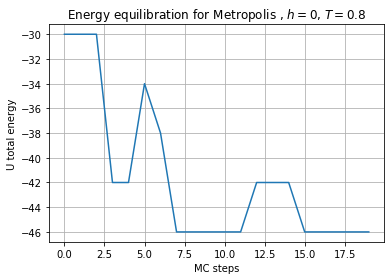

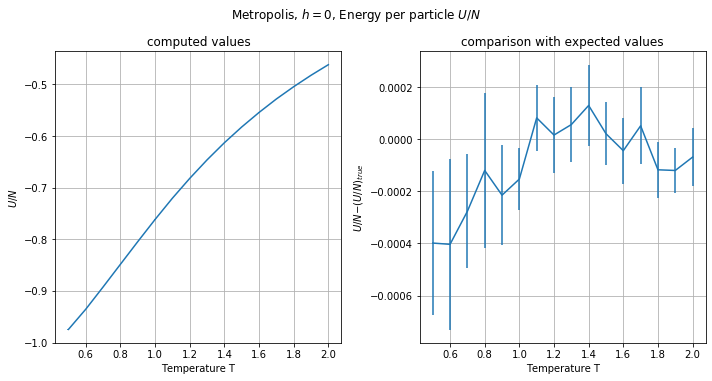

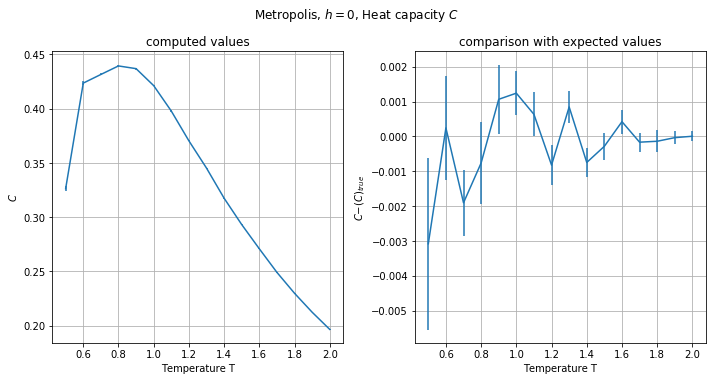

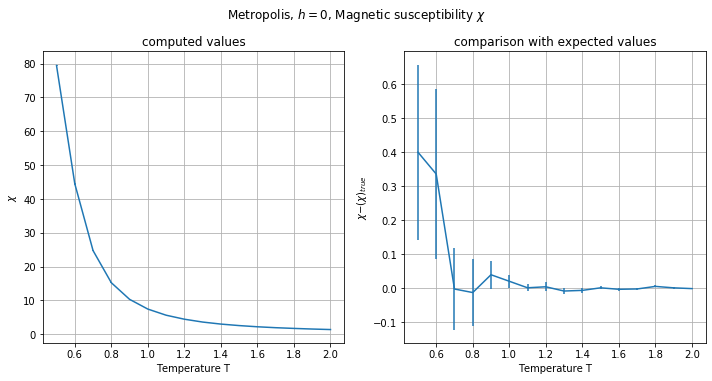

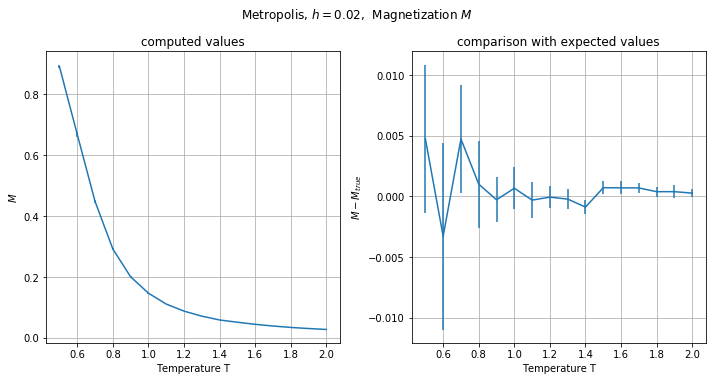

In [9]:
plot_results(metro)

### Gibbs Algorythm

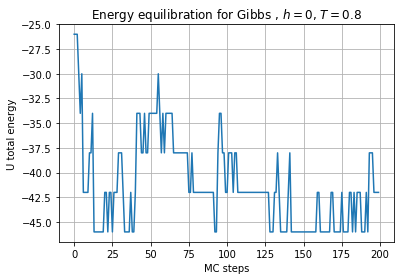

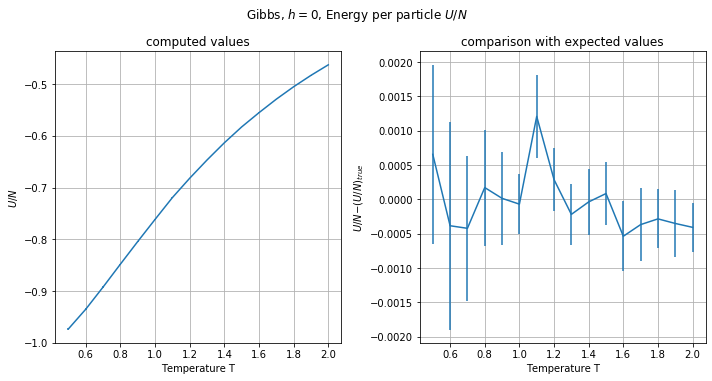

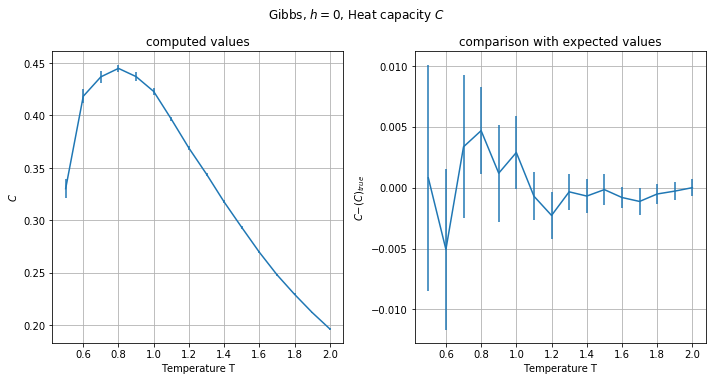

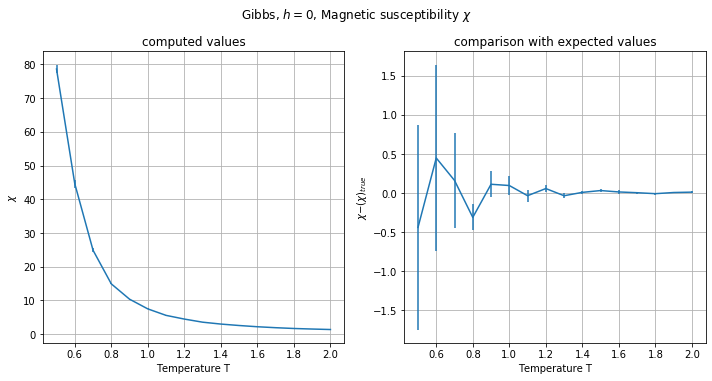

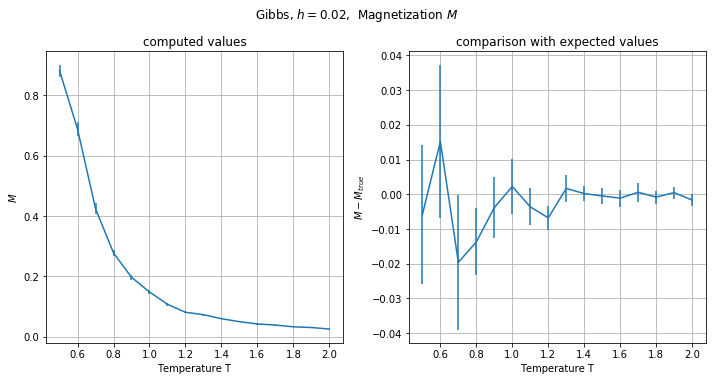

In [4]:
plot_results(gibbs)